In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
path = r"E:\1. Thesis\PDD_MangoLeaf\Dataset"

In [3]:
batch_size = 16

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
image_generator = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    zoom_range=0.2,
                                    validation_split=0.2)

In [6]:
train_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=path,
                                                   shuffle=True,
                                                   target_size=(128,128),
                                                   subset="training",
                                                   class_mode="categorical")

Found 3200 images belonging to 8 classes.


In [7]:
validation_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=path,
                                                   shuffle=True,
                                                   target_size=(128,128),
                                                   subset="validation",
                                                   class_mode="categorical")

Found 800 images belonging to 8 classes.


In [8]:
IMG_SHAPE = (128,128,3)
num_of_categories = 8

In [9]:
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                        include_top=False,
                                        weights="imagenet")

In [11]:
inputs = tf.keras.Input(shape=(IMG_SHAPE))  # Define input
x = base_model(inputs, training=False)  # Pass input to base model
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_of_categories, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)  # Create model


In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           8,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,557,896 (78.42 MB)

 Trainable params: 20,557,896 (78.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected 'optimizers'
    metrics=['accuracy']
)


In [ ]:
hist = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
)

In [14]:
train_loss,train_acc = model.evaluate(train_dataset)
print('Training Accuracy:', train_acc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1053s 5s/step - accuracy: 0.9786 - loss: 0.0679
Training Accuracy: 0.9762499928474426


In [15]:
val_loss,val_acc = model.evaluate(validation_dataset)
print('Validation Accuracy:', val_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 301s 6s/step - accuracy: 0.9165 - loss: 0.2612
Validation Accuracy: 0.9212499856948853


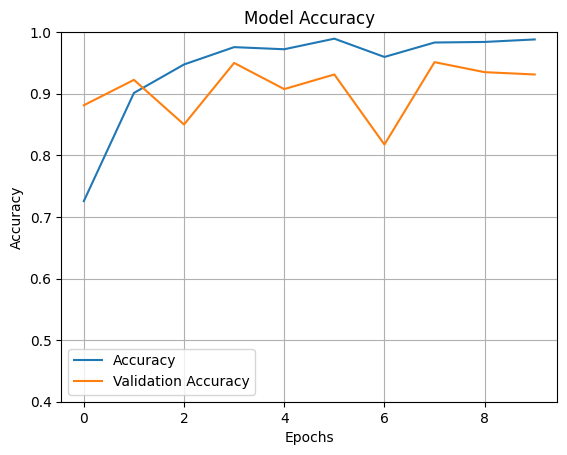

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

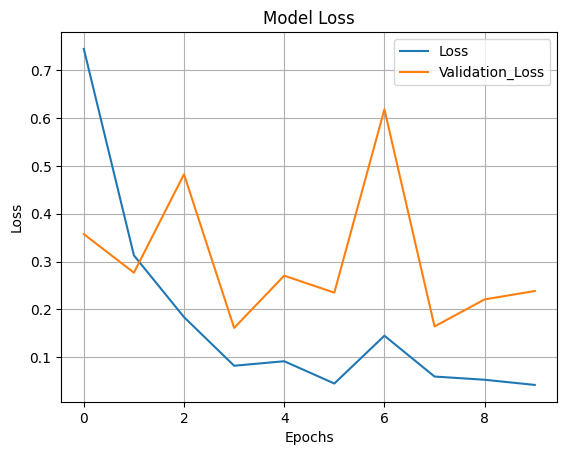

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Validation_Loss'])
plt.show()

In [ ]:
model.name="MangoLeaf_vgg19"

In [ ]:
model.save('VGG19_MangoLeaf.keras')

In [ ]:
test_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=path,
                                                   shuffle=False,
                                                   target_size=(128,128),
                                                   subset="training",
                                                   class_mode="categorical")